In [164]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [152]:
#reading the csv file as pandas dataframe
data=pd.read_csv("VesselData.csv",sep=".")

In [186]:
X = data[['vesseldwt',"vesseltype","previousportid","nextportid"]].copy()#select input features abd create a input matrix of features
X =X[~X.isin([np.nan, np.inf, -np.inf]).any(1)]#remove any large, small outside range values
#X = X.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(x)

y=data[['discharge1', 'load1', 'discharge2',"load2","discharge3","load3","discharge4","load4"]].copy() #output feature matrix
y =y[~y.isin([np.nan, np.inf, -np.inf]).any(1)]

In [183]:
#split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y[0:8204], test_size=0.4,
                                                    random_state=1)

In [184]:
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

ValueError: could not convert string to float: '2017-05-03 14:00:00+00'

In [185]:
#KNN model

In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))# normalising the features to bring all features in the same range

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [165]:

%matplotlib inline

In [179]:
rmse_val = [] #to store rmse values for different k
for K in range(0,50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 17698.75953696203
RMSE value for k=  2 is: 14986.325966490293
RMSE value for k=  3 is: 13947.432826588298
RMSE value for k=  4 is: 13356.208584620099
RMSE value for k=  5 is: 13034.413795700086
RMSE value for k=  6 is: 12726.576741072526
RMSE value for k=  7 is: 12585.653821808042
RMSE value for k=  8 is: 12465.558275186602
RMSE value for k=  9 is: 12344.987503550436
RMSE value for k=  10 is: 12292.160894958823
RMSE value for k=  11 is: 12262.35501269339
RMSE value for k=  12 is: 12245.05970520767
RMSE value for k=  13 is: 12198.281614485473
RMSE value for k=  14 is: 12201.712365663047
RMSE value for k=  15 is: 12173.066008999122
RMSE value for k=  16 is: 12134.845601393317
RMSE value for k=  17 is: 12093.065022304474
RMSE value for k=  18 is: 12055.97310754066
RMSE value for k=  19 is: 12040.72544153502
RMSE value for k=  20 is: 12015.102457541705
RMSE value for k=  21 is: 11985.961120218082
RMSE value for k=  22 is: 11978.888035335043
RMSE value for k=  23 is

<AxesSubplot:>

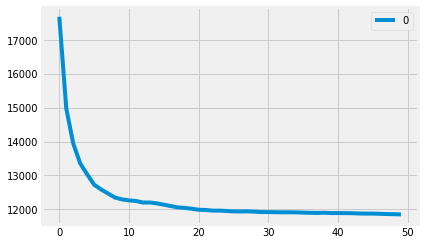

In [180]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [181]:
pred.shape
#K=25 would probably give the best results

(3282, 8)